<br /><h1 style="font-family:Impact,Arial;font-size:70px;">Air seen from desk compared to governments</h1>
<h2 style="font-family:Arial;">Marco Foo</h2>
<h2 style="font-family:Arial;">98044163</h2>
<p><small> 37373 Programming for Data Analysis</small></p>
<p><small><font color=MediumVioletRed>Autumn 2020</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract

Air quality data in the home and in western sydney

This project was a long time in the making, as the data I've gathered from a Kaiterra Laseregg was always piquing my curiosity about differences of the data it gathers versus the data that's openly avaliable from the government. AS environmental data is really interesting to me, as it dictates our effects and inability to control what is a daily fact of life. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>1. Motivation</h1>
Wanting to do something with the data that my air quality indicator gathers on a daily basis. I'm interested to see how the air in my day-to-day case of nearby a computer inside a home differs to generic readings of what the air quality is told to be outside.

<hr style="height:5px;border:none;color:#333;background-color:#333;"/>
<h1>2. The data</h1>
My dataset is gathered within non-scientifically through the use of a Kaiterra Laser egg model NB500 placed on my workdesk in an open room.

The initial proposed dataset was mistakenly assumed to have the full recorded 894 days worth of air quality data recorded, however it was later found out to only contain 10000 records. Such that a bunch of datasets had to be downloaded to get the full recorded air quality data. 

What's recorded my datasets:

"Time Point" - Date format of 'YYYY/MM/DD HH:MM'

"PM10 (µg/m³)" - Integer recording of PM10

"PM2.5 (µg/mÂ³)" - Integer recording of PM2.5

"humidity (%)" - Float recording of the humidity to 2 decimal places

"temp (C)" - Float recording of the temperature to 2 decimal places

"Overall Index (US)" - AQI recording according to the US standard

<p>
The openly avaliable datasets I used to compare with my dataset are found within NSW Govt website with varying options of data output, <a href="https://www.dpie.nsw.gov.au/air-quality/search-for-and-download-air-quality-data">here</a>.
</p>
Specifically, I choose to output multiple differing datasets to draw comparisons with my original datasets.

Hourly AQI averages for the date range of 2019 January 1st to 2020 June 15th for both Prospect and North Parramatta site indexes. 
$#@$#$#for all of the possible sydney-north-west data collection sites. Vineyard's data is all empty, so it's excluded. 
Note, this AQI 

Hourly reported PM2.5, PM10, Windspeed, wind direction, air temperature, relative humidity, global solar radiation and rainfall for the date range of 2019 January 1st to 2020 June 15th for Prospect, and North Parramatta individually. They're seperate datasets due to the query not allowing the combination due to it's size. 
$#$#$for all possible sydney-north-west data collection sites excluding the empty Vineyard option, individually.
<p>
This brings the question of the differing AQI measurements, and whether the recorded AQI is using the US standard or another. 
The <a href="https://www.environment.nsw.gov.au/topics/air/understanding-air-quality-data/air-quality-index">overview of the Australian AQI</a>,
<a href="https://aqicn.org/faq/2014-09-06/australian-air-quality-comparison-with-the-us-epa-aqi-scale/">US and Australian AQI comparison</a> and <a href ="https://www.legislation.gov.au/Details/F2016C00215">government legislation</a> helped with discerning each of the scales. An unsolved problem I encountered researching the National Environment Protection Measure (NEPM) standard, i.e. the standard used in NSW, is that I couldn't find any hard formula other than ranges. As the US AQI standard is widely known and avaliable, as seen in <a href ="https://forum.airnowtech.org/t/the-aqi-equation/169">here</a>. If down, image in the appendix.
</p>


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>3. Data preparation</h1>
I struggled and spend the most time here, there's probably more efficient ways of doing things but I went about data prep with the mentality of:
Grab dataset -> clean if needed -> make it an easy-to-use format to then analyse the data.

In [100]:
# df_avgmyData = pd.DataFrame(index=df_allmyData['Time'])
# print(df_allmyData.rolling(window=60)['PM10'].mean())
# print(df_allmyData.rolling(window=60, min_periods=1)['PM10'].mean())
# df_allmyData[:292581:-1]
    # df_allmyData
    # .assign(PM10_avg=df_allmyData.rolling(window=60, min_periods=1)['PM10'].mean())
    # .groupby(df_allmyData['Time'].dt.date)['PM10_avg']
    # .last())
# df_allmyData[:292581:-1]
# df_allmyData.head()

# list_my_df_names_early = [item[0:13] for item in list_my_df_fullnames]
# list_my_df_names_latest = [item[17:30] for item in list_my_df_fullnames]
# rMy_df = pd.read_csv("../myData/20181115 2322 to 20190102 1847.csv", parse_dates=True, infer_datetime_format=True, header=7)
# list_my_df[1].head()
# 'Time Point', 'PM10 (µg/m³)', 'PM2.5 (µg/m³)', 'humidity (%)', 'temp (C)', 'Overall Index (US)', 'Primary Pollutant'
# 'Time', 'PM10', 'PM2.5', 'Humidity', 'Temp', 'USAQI', 'HighestPMType'
# my_df_header
# Not Working right annoyingly #my_df_header = str(pd.read_csv("../myData/20181115 2322 to 20190102 1847.csv", header=7, nrows=0).columns)

# df_nParra_org = pd.read_excel(list_govt_df_path[1], header=2, parse_dates=[['Date', 'Time']], names=list_govt_headings[7:14], index_col=1)
# df_prospect_org = pd.read_excel(list_govt_df_path[2], header=2, parse_dates=[['Date', 'Time']], names=list_govt_headings[15:21], index_col=1)
# df_richmond_org = pd.read_excel(list_govt_df_path[3], header=2, parse_dates=[['Date', 'Time']], names=list_govt_headings[22:28], index_col=1)
# df_rouseHill_org = pd.read_excel(list_govt_df_path[4], header=2, parse_dates=[['Date', 'Time']], names=list_govt_headings[29:35], index_col=1)
# df_stMarys_org = pd.read_excel(list_govt_df_path[5], header=2, parse_dates=[['Date', 'Time']], names=list_govt_headings[36:42], index_col=True)
# df_westSydAQI_noVinyard_org = pd.read_excel(list_govt_df_path[7], header=2, parse_dates=[['Date', 'Time']], names=list_govt_headings[50:56], ignore_index=True)

# def droppingNaa(dataset):
#     lenBefore = len(dataset)
#     dataset.dropna(dataset)
#     lenAfter = len(dataset)
#     print('Dropped ' + str(lenBefore - lenAfter) + ' Naas from ' + str(dataset))
# def droppingDupes(dataset, subset='Time', ignore_index=True):
#     lenBefore = len(dataset)
#     dataset.drop_duplicates(subset=subset, ignore_index=ignore_index)
#     lenAfter = len(dataset)
#     print('Dropped ' + str(lenBefore - lenAfter) + ' Dupes from ' + str(dataset))
# droppingDupes(df_allmyData)
# droppingNaa(df_allmyData)

# list_govt_df = []
# for file in list_govt_file_names:
#     path = Path(gPath, file)
#     df_govtData = df_govtData.merge(df_govtData)
#     df_govtData = pd.read_excel(path, header=2)
# # df_govtData = pd.merge(list_govt_df)
# print(df_govtData.head())
# print(df_govtData.tail())

In [101]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
%matplotlib inline
from pathlib import Path
import os
import re

In [102]:
# MyDatasets
# Archaic dataset names as seen in the MyData_org zip was later manually changed so that it follows the scheme of 'YYYYMMDD HHMMtoYYYYMMDD HHMM' denoting the earliest to latest point of data gathered
mPath = Path('../myData')
list_my_df_fullnames = [item.name for item in sorted(mPath.glob('*.csv'))]
list_my_df = []
for file in list_my_df_fullnames:
    path = Path(mPath, file)
    df_myData = pd.read_csv(path, header=7, names=['Date_Time', 'PM10m', 'PM2.5m', 'Humiditym', 'Tempm', 'US_AQIm', 'HighestPMType'])
    list_my_df.append(df_myData)
df_allmyData = pd.concat(list_my_df, ignore_index=True)
df_allmyData.head()

,Date_Time,PM10m,PM2.5m,Humiditym,Tempm,US_AQIm,HighestPMType
0,2018-11-15 23:22:00,2.0,2.0,24.44,28.99,8.0,PM2.5
1,2018-11-15 23:30:00,3.0,3.0,25.33,28.02,13.0,PM2.5
2,2018-11-15 23:31:00,4.0,4.0,25.50,27.93,17.0,PM2.5
3,2018-11-15 23:32:00,3.0,1.0,26.08,27.88,4.0,PM2.5
4,2018-11-15 23:33:00,3.0,3.0,25.99,27.85,13.0,PM2.5


In [103]:
# We've got 68 minutes worth of unrecorded air quality statistics, time to find those rows and take them out. As well as the duplicated data that was a consequence of how I had to gather the data from Kaiterra's servers.

print(df_allmyData.count())
print(df_allmyData[9760:9833])

df_allmyData = df_allmyData.drop_duplicates(subset='Date_Time', ignore_index=True)
df_allmyData = df_allmyData.dropna()

print(df_allmyData.count())
print(df_allmyData[9760:9833])
print(df_allmyData.dtypes)

Date_Time        336460
PM10m            336392
PM2.5m           336392
Humiditym        336460
Tempm            336460
US_AQIm          336392
HighestPMType    336392
dtype: int64
                Date_Time  PM10m  PM2.5m  Humiditym  Tempm  US_AQIm  \
9760  2019-01-02 18:35:00   68.0    58.0      24.49  22.89    152.0   
9761  2019-01-02 18:36:00   66.0    57.0      24.50  22.90    152.0   
9762  2019-01-02 18:37:00   67.0    59.0      24.39  22.91    153.0   
9763  2019-01-02 18:38:00   61.0    55.0      24.34  22.92    149.0   
9764  2019-01-02 18:39:00   68.0    60.0      24.33  22.93    153.0   
...                   ...    ...     ...        ...    ...      ...   
9828  2019-01-02 18:35:00   68.0    58.0      24.49  22.89    152.0   
9829  2019-01-02 18:36:00   66.0    57.0      24.50  22.90    152.0   
9830  2019-01-02 18:37:00   67.0    59.0      24.39  22.91    153.0   
9831  2019-01-02 18:38:00   61.0    55.0      24.34  22.92    149.0   
9832  2019-01-02 18:39:00   68.0    60

Looks good, time for the data types and go for rolling averages per hour, similar to the NSW dataset

In [104]:
# Converting types
dateFormat='%Y/%m/%d %H:%M:%S'

df_allmyData['PM10m'] = df_allmyData['PM10m'].astype('int64')
df_allmyData['PM2.5m'] = df_allmyData['PM2.5m'].astype('int64')
df_allmyData['US_AQIm'] = df_allmyData['US_AQIm'].astype('int64')

df_allmyData['HighestPMType'] = df_allmyData['HighestPMType'].astype('category')
df_allmyData['HighestPMType'] = df_allmyData['HighestPMType'].cat.codes

df_allmyData['Date_Time'] = pd.to_datetime(df_allmyData['Date_Time'], format='%Y-%m-%d %H:%M:%S')
df_allmyData['Date_Time'] = df_allmyData['Date_Time'].dt.strftime(dateFormat)
df_allmyData['Date_Time'] = pd.to_datetime(df_allmyData['Date_Time'])

In [105]:
# Setting the time as index so we can use the offset windows option when rolling
df_allmyData = df_allmyData.set_index('Date_Time')

# 1 Hour rolling averages
df_allmyData['my_PM10'] = df_allmyData.rolling(window='60min')['PM10m'].mean()
df_allmyData['my_PM2.5'] = df_allmyData.rolling(window='60min')['PM2.5m'].mean()
df_allmyData['my_Humidity'] = df_allmyData.rolling(window='60min')['Humiditym'].mean()
df_allmyData['my_Temp'] = df_allmyData.rolling(window='60min')['Tempm'].mean()
df_allmyData['my_US_AQI'] = df_allmyData.rolling(window='60min')['US_AQIm'].mean()

# Seems good to analyse now
print(df_allmyData.dtypes)
print(df_allmyData.head())
print(df_allmyData[9760:9820])
print(df_allmyData.tail())

PM10m              int64
PM2.5m             int64
Humiditym        float64
Tempm            float64
US_AQIm            int64
HighestPMType       int8
my_PM10          float64
my_PM2.5         float64
my_Humidity      float64
my_Temp          float64
my_US_AQI        float64
dtype: object
                     PM10m  PM2.5m  Humiditym  Tempm  US_AQIm  HighestPMType  \
Date_Time                                                                      
2018-11-15 23:22:00      2       2      24.44  28.99        8              1   
2018-11-15 23:30:00      3       3      25.33  28.02       13              1   
2018-11-15 23:31:00      4       4      25.50  27.93       17              1   
2018-11-15 23:32:00      3       1      26.08  27.88        4              1   
2018-11-15 23:33:00      3       3      25.99  27.85       13              1   

                     my_PM10  my_PM2.5  my_Humidity    my_Temp  my_US_AQI  
Date_Time                                                                 

In [106]:
# Public avaliable datasets

gPath = Path('../govtData')
list_govt_df_names = [item.name for item in sorted(gPath.glob('*.xls'))]
list_govt_df_path = [os.path.join(gPath, item) for item in list_govt_df_names]
# dParser=lambda x: pd.to_datetime(x).strftime("%Y/%M/%D %H:%M")

# df_nParra = pd.read_excel(list_govt_df_path[0], header=2, parse_dates=[['Date', 'Time']], index_col=0)
# df_prospect = pd.read_excel(list_govt_df_path[1], header=2, parse_dates=[['Date', 'Time']], index_col=0)
# df_richmond = pd.read_excel(list_govt_df_path[2], header=2, parse_dates=[['Date', 'Time']], index_col=0)
# df_rouseHill = pd.read_excel(list_govt_df_path[3], header=2, parse_dates=[['Date', 'Time']], index_col=0)
# df_stMarys = pd.read_excel(list_govt_df_path[4], header=2, parse_dates=[['Date', 'Time']], index_col=0)
# df_westSydAQI_noVinyard = pd.read_excel(list_govt_df_path[5], header=2, parse_dates=[['Date', 'Time']], index_col=0)

df_nParra = pd.read_excel(list_govt_df_path[0], header=2, parse_dates=[['Date', 'Time']])
df_prospect = pd.read_excel(list_govt_df_path[1], header=2, parse_dates=[['Date', 'Time']])
df_richmond = pd.read_excel(list_govt_df_path[2], header=2, parse_dates=[['Date', 'Time']])
df_rouseHill = pd.read_excel(list_govt_df_path[3], header=2, parse_dates=[['Date', 'Time']])
df_stMarys = pd.read_excel(list_govt_df_path[4], header=2, parse_dates=[['Date', 'Time']])
df_westSydAQI_noVinyard = pd.read_excel(list_govt_df_path[5], header=2, parse_dates=[['Date', 'Time']])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [107]:
def convertDate(df):
    dateFormat = '%Y/%m/%d %H:%M:%S'
    s = df['Date_Time'].str.split()
    df['Date_Time'] = pd.to_datetime(s.str[0], format='%d/%m/%Y') + pd.to_timedelta(s.str[1].str.split(':').str[0] +' hours')
    df['Date_Time'] = pd.to_datetime(df['Date_Time'])
    df['Date_Time'] = df['Date_Time'].dt.strftime(dateFormat)
    df['Date_Time'] = pd.to_datetime(df['Date_Time'])
    print(df.dtypes)

In [108]:
convertDate(df_nParra)
convertDate(df_prospect)
convertDate(df_richmond)
convertDate(df_rouseHill)
convertDate(df_stMarys)
convertDate(df_westSydAQI_noVinyard)

Date_Time                                    datetime64[ns]
PARRAMATTA NORTH WDR 1h average [°]                 float64
PARRAMATTA NORTH TEMP 1h average [°C]               float64
PARRAMATTA NORTH WSP 1h average [m/s]               float64
PARRAMATTA NORTH PM10 1h average [µg/m³]            float64
PARRAMATTA NORTH PM2.5 1h average [µg/m³]           float64
PARRAMATTA NORTH HUMID 1h average [%]               float64
PARRAMATTA NORTH SOLAR 1h average [W/m²]            float64
dtype: object
Date_Time                            datetime64[ns]
PROSPECT WDR 1h average [°]                 float64
PROSPECT TEMP 1h average [°C]               float64
PROSPECT WSP 1h average [m/s]               float64
PROSPECT PM10 1h average [µg/m³]            float64
PROSPECT PM2.5 1h average [µg/m³]           float64
PROSPECT HUMID 1h average [%]               float64
PROSPECT SOLAR 1h average [W/m²]            float64
dtype: object
Date_Time                            datetime64[ns]
RICHMOND WDR 1h average 

In [109]:
df_nParra = df_nParra.set_index('Date_Time')
df_prospect = df_prospect.set_index('Date_Time')
df_richmond = df_richmond.set_index('Date_Time')
df_rouseHill = df_rouseHill.set_index('Date_Time')
df_stMarys = df_stMarys.set_index('Date_Time')
df_westSydAQI_noVinyard = df_westSydAQI_noVinyard.set_index('Date_Time')

In [110]:
# Couldn't change the headings as I wanted during the reading excel bit so it got bumped to here
# This is where only richmond and rouse hill was discovered to have rainfall in their datasets.

govt_headings = ['WDR', 'Temp', 'WSP', 'PM10', 'PM2.5', 'Humid', 'Solar', 'Rain']
pattern = re.compile('[A-z]+[_]')
siteNames = [pattern.findall(item) for item in list_govt_df_names]
siteNames_flat = [item for sublist in siteNames for item in sublist]
list_govt_headings = ['g_'+site+head for site in siteNames_flat for head in govt_headings]
headings_nParra = list_govt_headings[0:7] 
headings_prospect = list_govt_headings[8:15]
headings_richmond = list_govt_headings[16:24]
headings_rouseHill = list_govt_headings[24:31]
headings_stMarys = list_govt_headings[32:39]

df_nParra.columns = headings_nParra
df_prospect.columns = headings_prospect
df_richmond.columns = headings_richmond
df_rouseHill.columns = headings_rouseHill
df_stMarys.columns = headings_stMarys
df_westSydAQI_noVinyard.columns = ['g_richmond_AQI', 'g_stMarys_AQI', 'g_nParra_AQI', 'g_prospect_AQI', 'g_rouseHill_AQI']

In [111]:
dict_df = {
    'allMyData': df_allmyData,
    'nParra': df_nParra,
    'prospect': df_prospect,
    'richmond': df_richmond,
    'rouseHill': df_rouseHill,
    'stMarys': df_stMarys,
    'westSydAQI': df_westSydAQI_noVinyard
}
dict_df['westSydAQI']['g_nParra_AQI'] = dict_df['westSydAQI']['g_nParra_AQI'].astype('float64')

In [112]:
#Time to make a dataframe with everything!
index_sum = [dict_df[d].index.tolist() for d in dict_df]
index_sum_flat = [item for sublist in index_sum for item in sublist]
unique_index = sorted(list(set(index_sum_flat)))
unique_index = pd.to_datetime(unique_index)
df_all_hour = pd.DataFrame(index=unique_index)
for d in dict_df:
    df_all_hour = df_all_hour.join(dict_df[d])
    
df_all_hour

,PM10m,PM2.5m,Humiditym,Tempm,US_AQIm,HighestPMType,my_PM10,my_PM2.5,my_Humidity,my_Temp,...,g_stMarys_WSP,g_stMarys_PM10,g_stMarys_PM2.5,g_stMarys_Humid,g_stMarys_Solar,g_richmond_AQI,g_stMarys_AQI,g_nParra_AQI,g_prospect_AQI,g_rouseHill_AQI
2018-11-15 23:22:00,2.0,2.0,24.44,28.99,8.0,1.0,2.0,2.0,24.4400,28.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-15 23:30:00,3.0,3.0,25.33,28.02,13.0,1.0,2.5,2.5,24.8850,28.505000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-15 23:31:00,4.0,4.0,25.50,27.93,17.0,1.0,3.0,3.0,25.0900,28.313333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-15 23:32:00,3.0,1.0,26.08,27.88,4.0,1.0,3.0,2.5,25.3375,28.205000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-15 23:33:00,3.0,3.0,25.99,27.85,13.0,1.0,3.0,2.6,25.4680,28.134000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3,7.8,20.1,92.0,NaN,25.0,34.0,23.0,29.0,23.0
2020-06-15 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1,15.1,9.6,90.5,NaN,21.0,36.0,23.0,29.0,23.0
2020-06-15 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3,8.6,11.2,94.8,NaN,24.0,37.0,23.0,29.0,22.0
2020-06-15 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3,8.9,12.1,96.0,NaN,23.0,37.0,17.0,30.0,22.0


Looks good, time to explore the data!

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>4. Exploratory data analysis</h1>

<h2>Possible questions to ask</h2>
<li> What does it look like seasonally? </li>
<li> What's a week look like? </li>
<li> How does each of the PM stats compare to eachother? </li>
<li> How does the meterological stats compare to eachother? </li>
<li> Does wind, rain or other meterological measures have a correlation with the air quality indicators? </li>

But first, quick and dirty, bunch of plots to see where some possible points of interest are at.

In [113]:
plt.style.use('seaborn-colorblind')

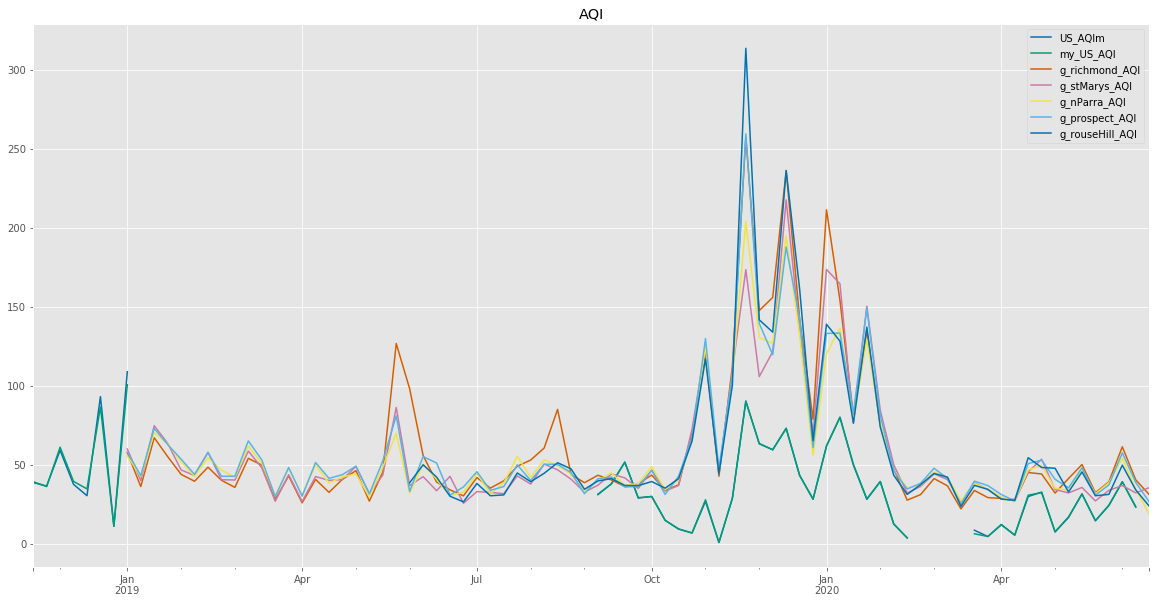

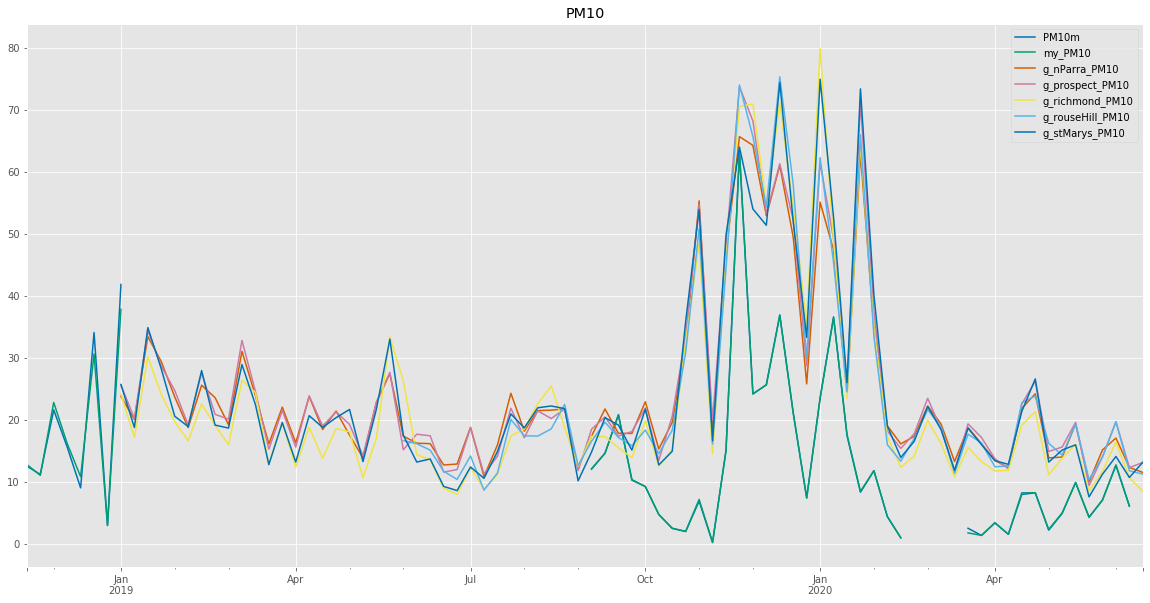

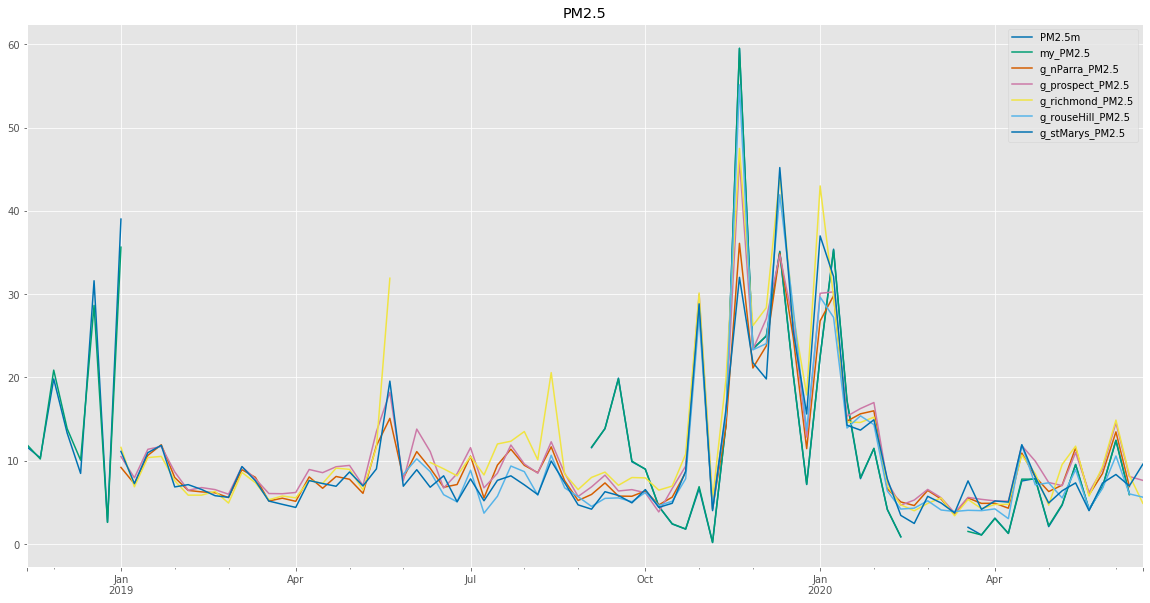

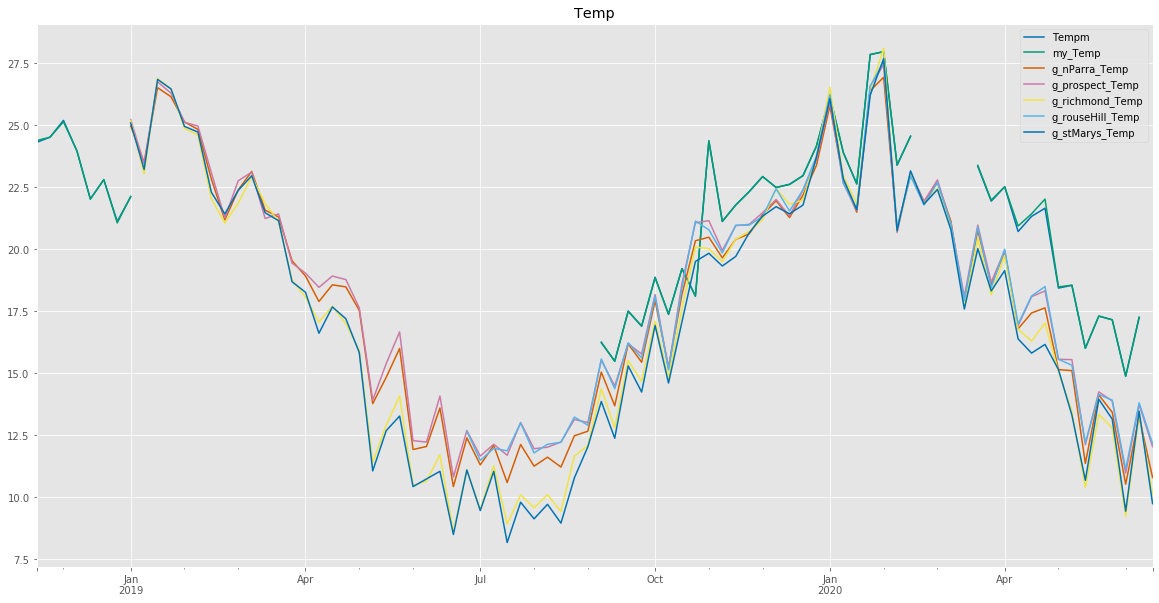

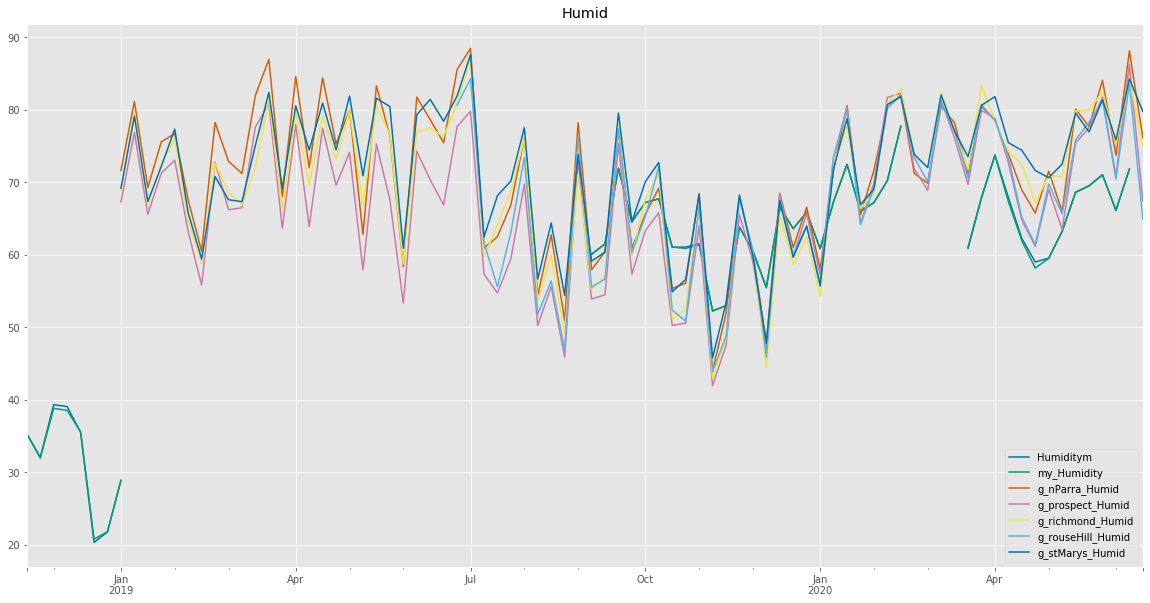

In [114]:
# Weekly averages
df_all_hour[df_all_hour.filter(like='AQI').columns].resample('W').mean().plot(title='AQI',figsize=(20,10))
df_all_hour[df_all_hour.filter(like='PM10').columns].resample('W').mean().plot(title='PM10', figsize=(20,10))
df_all_hour[df_all_hour.filter(like='PM2.5').columns].resample('W').mean().plot(title='PM2.5', figsize=(20,10))
df_all_hour[df_all_hour.filter(like='Temp').columns].resample('W').mean().plot(title='Temp', figsize=(20,10))
df_all_hour[df_all_hour.filter(like='Humid').columns].resample('W').mean().plot(title='Humid', figsize=(20,10))

Interestingly enough, the differing AQI standards seem to roughly follow eachother in the same scale. Temperature shows a seasonal trend, although humidity not as telling as humidity seems to be cyclical in some form. It seems humidity could be affected by something else. The difference between my indoor readings and what the stations recorded is up next.

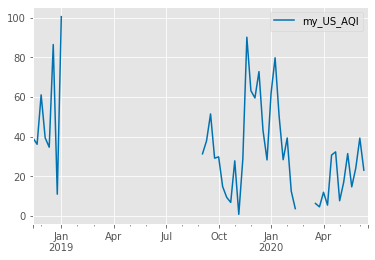

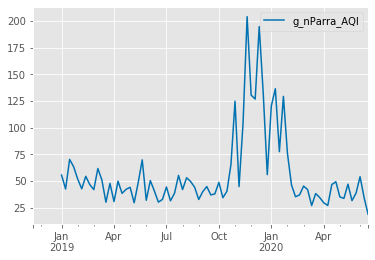

In [122]:
df_all_hour[df_all_hour.filter(like='my_US_AQI').columns].resample('W').mean().plot()
df_all_hour[df_all_hour.filter(like='g_nParra_AQI').columns].resample('W').mean().plot()
# df_all_hour['my_US_AQI'].plot()
# df_all_hour['my_aqi_diff'] = df_all_hour['my_US_AQI'] - df_all_hour['g_nParra_AQI']

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>5. Results/Insights</h1>

Discuss any non-trivial result or insight into the problem stemming from your analysis.

<b>Create as many code, markdown and raw cells as needed</b>

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>6. In hindsight...</h1>

In this section you should reflect on your work and what you've learned. In particular you should include:

<ul>
    <li> a discussion of the most challenging aspect of the data analysis and if/how you overcame the challenge.</li>
    <li> a discussion of any programming technique and/or reference you found particularly useful or helpful for your project.</li>
    <li> an assessment of the outcome of the study in relation to the original goals (i.e., have the goals been reached, or did you have to reassess the goals during the project, and if so why?).</li>
    <li> a discussion of what new, or surprising knowledge or insight into the problem you've gained by conducting the study.</li>
    <li> a discussion of whether you would approach the problem differently if given an opportunity to redo the work, and any advice they would give to someone who would want to work on a similar problem.</li>
    <li> a discussion of how your analysis could be improved or extended in future work.</li>

</ul>

In hindsight, the time spent manually changing the filenames was wasted due to how data was read. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>Appendix</h1>
<p> Image of US AQI calculation </p>
<a href="https://forum.airnowtech.org/t/the-aqi-equation/169"><img src="https://puu.sh/FWnlz/f37ea1e65d.png"></a>

The adventure into the air quality data I've gathered. 
My non-scientific and possible real-world-case approach to how I went through the analysais of my gathered dataset.

For context, this dataset is gathered by a Kaiterra LaserEgg model LE-200 that is placed on my work desk at my home. Not in scientific conditions, as the layout of my house can describe this [Insert quick layout]

 